<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!pip install catboost
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.sample(n=7)
data.info()
data['TotalSpent'] = data['TotalSpent'].replace(r'^\s*$', np.nan, regex=True).astype('float') # =замена пропусков значений TotalSpent на nan
data_loss = data.isna().sum() # таблица с количеством nan в каждой колонке
if sum(data.isna().any(axis=1)) > 0:
    data = data.replace(np.nan, '0') #замена nan на 0
data_loss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

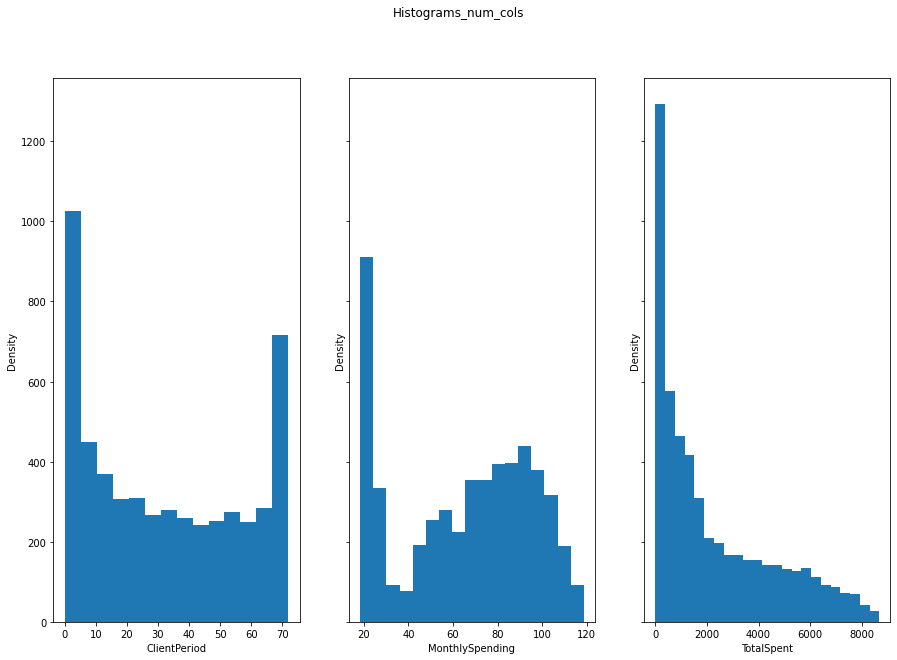

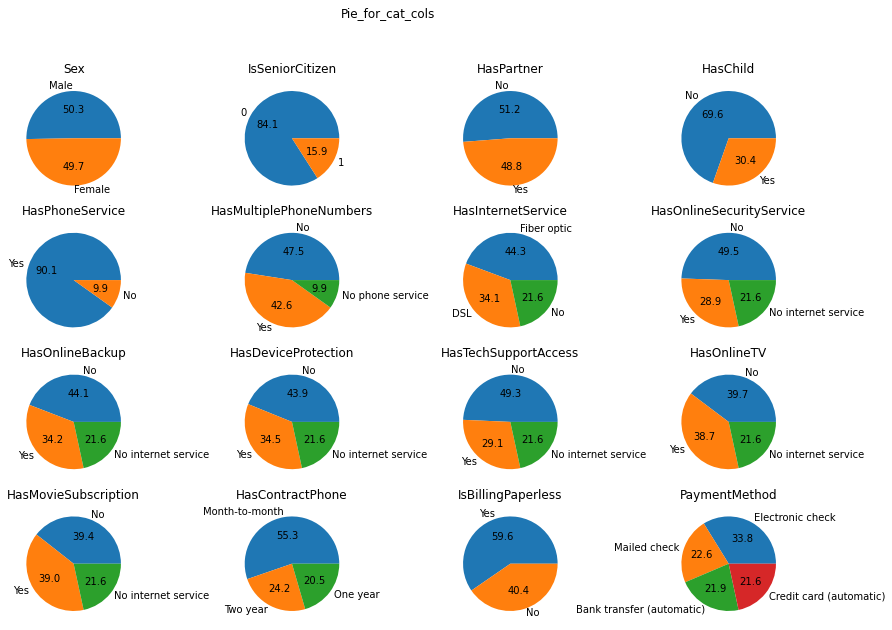

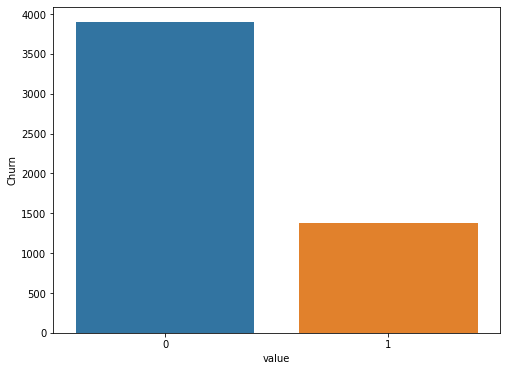

In [ ]:
import seaborn as sns
#Проверка численных признаков
# разделение датасета на числовые и категориальные признаки_для удобства
numeric_data = data[num_cols]
categorical_data = data[cat_cols]

#Построение гистограмм для категориальных признаков
fig_1, axs_1 = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

for i in range(len(numeric_data.columns)):
    axs_1[i].hist(numeric_data[num_cols[i]], bins='auto')
    axs_1[i].set_xlabel(num_cols[i])
    axs_1[i].set_ylabel('Density')
plt.suptitle('Histograms_num_cols')
plt.show()
#Выбросов нет, данные сбалансированны

#Построение pie_plot для категориальных признаков
fig_2, axs_2 = plt.subplots(4, 4, figsize=(15, 10))

index = 0
for i in range(0, 4):
    for j in range(0, 4):
        tmp = categorical_data[cat_cols[index]].value_counts()
        axs_2[i][j].pie(tmp.tolist(), labels=tmp.index.tolist(), radius=1, autopct='%.1f')
        axs_2[i][j].title.set_text(cat_cols[index])
        index += 1
plt.suptitle('Pie_for_cat_cols')
plt.show()
#Выбросов также нет все отлично

fig = plt.figure(figsize=(8,6))
ax_3 = sns.barplot(data=data, x=data[target_col].value_counts().index.tolist(), y=data[target_col].value_counts().tolist())
ax_3.set(ylabel=target_col, xlabel='value')
fig.patch.set_facecolor('xkcd:white')
plt.show()

#Классы не сбалансированны целевой переменной со значением 0 в трое больше, чем 1

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer

In [ ]:
#Первый способ решения_с_плохой метрикой
'''preprocessor = ColumnTransformer(transformers=[
    ('oh', OneHotEncoder(), cat_cols)
])

model = Pipeline(steps=[
    ('prep', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())])
X = data.drop(target_col, axis=1)
y = data[target_col]
parameters = {'clf__C' : [100, 10, 1, 0.1, 0.01, 0.001], 'scaler': [StandardScaler(), RobustScaler()]}
CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=-1,
                            verbose=10)
CV_model.fit(X, y)
print(CV_model.best_params_)
print(CV_model.best_score_)'''
#Второй способ решения
X = data.drop(target_col, axis=1)
y = data[target_col]
cat_preprocessor = Pipeline(steps=[
    ('oh', OneHotEncoder(drop='first')),
    ('rs', RobustScaler(with_centering=False))
])
num_preprocessor = Pipeline(steps=[
    ('rs', RobustScaler(with_centering=False)) # Create a place holder for your test here !!!
])
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_preprocessor, cat_cols),
    ('num', num_preprocessor, num_cols)
])
model = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression())])
parameters = {'clf__C' : [72.2]}
CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=-1,
                            verbose=10)
CV_model.fit(X, y)
print(CV_model.best_params_)
print(CV_model.best_score_)
#Третий способ решения(наиболее простой)
'''numeric_data_preprocessing = pd.DataFrame(StandardScaler().fit_transform(numeric_data), columns=num_cols)
dummy_features = pd.get_dummies(categorical_data)
X = pd.concat([numeric_data_preprocessing, dummy_features], axis=1)
y = data[target_col]

parameters = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}
CV_model = GridSearchCV(estimator=LogisticRegression(),
                            param_grid=parameters,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=-1,
                            verbose=10)
CV_model.fit(X, y)
best_C = CV_model.best_params_
print(CV_model.best_params_)
print(CV_model.best_score_)'''

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'clf__C': 72.2}
0.8451371202248991


"numeric_data_preprocessing = pd.DataFrame(StandardScaler().fit_transform(numeric_data), columns=num_cols)\ndummy_features = pd.get_dummies(categorical_data)\nX = pd.concat([numeric_data_preprocessing, dummy_features], axis=1)\ny = data[target_col]\n\nparameters = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}\nCV_model = GridSearchCV(estimator=LogisticRegression(), \n                            param_grid=parameters,\n                            cv=5, \n                            scoring='roc_auc',\n                            n_jobs=-1, \n                            verbose=10)\nCV_model.fit(X, y)\nbest_C = CV_model.best_params_\nprint(CV_model.best_params_)\nprint(CV_model.best_score_)"

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Наилучшее качество 0.8451371202248991 с параметром С = 72.2

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
from sklearn.metrics import classification_report
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
train_dataset = catboost.Pool(X_train, y_train, cat_features=cat_cols)
'''boosting_model = catboost.CatBoostClassifier(iterations=290,
                                             learning_rate= 0.05,
                                             l2_leaf_reg = 3.7,
                                             max_depth = 5,
                                             subsample = 0.8,
                                             random_strength = 1,
                                             loss_function='Logloss',
                                             eval_metric='AUC')
parameters_for_grid_catboost = {'eta': np.arange(0.1, 1, 0.1),
                                'min_data_in_leaf': np.arange(1, 10)}
grid_search_result = boosting_model.grid_search(parameters_for_grid_catboost,
                                       train_dataset,
                                       cv=5,
                                       search_by_train_test_split=True,
                                       train_size=0.8,
                                       plot=True)
print(grid_search_result['params'])'''
boosting_model = catboost.CatBoostClassifier(iterations=290,
                                             learning_rate= 0.05,
                                             l2_leaf_reg = 3.7,
                                             max_depth = 5,
                                             subsample = 0.8,
                                             random_strength = 1,
                                             min_data_in_leaf = 1,
                                             loss_function='Logloss',
                                             eval_metric='AUC')
boosting_model.fit(train_dataset)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)
print(train_auc)
print(test_auc)



0:	total: 7.59ms	remaining: 2.19s
1:	total: 15.7ms	remaining: 2.27s
2:	total: 23.7ms	remaining: 2.26s
3:	total: 31.5ms	remaining: 2.25s
4:	total: 39ms	remaining: 2.22s
5:	total: 46.8ms	remaining: 2.21s
6:	total: 54.6ms	remaining: 2.21s
7:	total: 58.8ms	remaining: 2.07s
8:	total: 65.6ms	remaining: 2.05s
9:	total: 71.8ms	remaining: 2.01s
10:	total: 76.1ms	remaining: 1.93s
11:	total: 86ms	remaining: 1.99s
12:	total: 93.5ms	remaining: 1.99s
13:	total: 101ms	remaining: 1.99s
14:	total: 108ms	remaining: 1.98s
15:	total: 116ms	remaining: 1.98s
16:	total: 122ms	remaining: 1.96s
17:	total: 130ms	remaining: 1.96s
18:	total: 137ms	remaining: 1.96s
19:	total: 146ms	remaining: 1.97s
20:	total: 150ms	remaining: 1.93s
21:	total: 158ms	remaining: 1.93s
22:	total: 167ms	remaining: 1.93s
23:	total: 175ms	remaining: 1.93s
24:	total: 182ms	remaining: 1.93s
25:	total: 190ms	remaining: 1.93s
26:	total: 198ms	remaining: 1.93s
27:	total: 208ms	remaining: 1.95s
28:	total: 216ms	remaining: 1.94s
29:	total: 223m

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший рейтинг на kaggle: 0.85223, parameters:
iterations=290,
                                          learning_rate= 0.05,
                                          l2_leaf_reg = 3.7,
                                          max_depth = 5,
                                          subsample = 0.8,
                                          random_strength = 1,
                                          min_data_in_leaf = 1,


# Предсказания

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
X_test.replace(' ', 1, inplace=True)
X_test.TotalSpent = X_test.TotalSpent.astype(float)
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
# best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

CatBoostError: ignored


Виталий Бауэр 0.85223

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик.
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.